<a href="https://colab.research.google.com/github/KazGet/Genetic-Algorithm-for-ODE/blob/main/Lab1_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy.random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import numpy as np

In [ ]:
np.random.seed(7)
array = np.random.uniform(-9.9, 9.9, (7, 7))

In [ ]:
#Бинаризация
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(array)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0.]]


In [ ]:
# Вывод среднего значения и стандартного отклонения
print ("\nBEFORE:")
print("Mean =", array.mean(axis=0))
print( "Std deviation =", array.std(axis=0))
#Исключение среднего
data_scaled = preprocessing.scale(array)
print ("\nAFTER: ")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


BEFORE:
Mean = [ 0.14415877  0.83444449 -2.32479225  2.96056065  1.15272653 -0.55322284
 -1.930964  ]
Std deviation = [6.59802061 5.0205845  2.53978809 2.88584139 6.22326413 4.75892195
 4.3403109 ]

AFTER: 
Mean = [ 7.93016446e-17  4.75809868e-17 -6.34413157e-17 -6.34413157e-17
  9.51619735e-17  0.00000000e+00  3.17206578e-17]
Std deviation = [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Масштабирование MinМax
data_scaler_minmax =preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(array)
print("\nМin max scaled data:\n", data_scaled_minmax)


Мin max scaled data:
 [[0.00484826 0.80910272 0.67966354 0.59373872 1.         0.58262352
  0.63579395]
 [0.         0.05614107 0.85855168 0.49694495 0.7937425  0.40389359
  0.        ]
 [0.24609929 1.         0.02484066 0.         0.94462313 0.
  0.78105662]
 [1.         0.         1.         1.         0.         0.56551305
  1.        ]
 [0.6798506  0.34955579 0.         0.08455482 0.28315526 0.51331774
  0.43822593]
 [0.87220787 0.79250999 0.31761531 0.2636766  0.1691243  0.48545892
  0.41936176]
 [0.66662425 0.20616831 0.73985355 0.58467742 0.33122128 1.
  0.16730417]]


In [ ]:
# Нормализация данных
data_normalized_l1 = preprocessing.normalize(array, norm='l1')
data_normalized_l2 = preprocessing.normalize(array, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[-2.81284939e-01  1.85835452e-01 -4.08895316e-02  1.48356428e-01
   3.17332738e-01  2.55570460e-02  7.43865278e-04]
 [-2.52370164e-01 -1.36556250e-01 -6.92916567e-05  1.05695580e-01
   1.79121097e-01 -7.02114390e-02 -2.55976178e-01]
 [-1.07935100e-01  2.08678782e-01 -1.46023780e-01 -2.43917754e-02
   2.19689865e-01 -2.42053264e-01  5.12274344e-02]
 [ 2.47582651e-01 -1.48340262e-01  2.66706864e-02  2.25030991e-01
  -2.01766116e-01  1.28775137e-02  1.37731779e-01]
 [ 2.13949160e-01 -4.08207578e-02 -3.73623326e-01 -1.16892041e-02
  -1.61544672e-01 -2.86072494e-02 -1.69765630e-01]
 [ 2.63314267e-01  2.09336947e-01 -1.44940062e-01  5.65915001e-02
  -1.74508258e-01 -3.67459823e-02 -1.14562984e-01]
 [ 1.15712833e-01 -9.53119105e-02 -3.00729580e-02  1.61236990e-01
  -6.39643985e-02  2.98783663e-01 -2.34917247e-01]]

L2 normalized data:
 [[-5.75742242e-01  3.80373439e-01 -8.36938894e-02  3.03660278e-01
   6.49525932e-01  5.23109095e-02  1.52256521e-03]
 [-5.69976761e-01 -

In [ ]:
# Предоставление меток входных данных
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']
# Создание кодировщика и установление соответствия
# между метками и числами
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
# Вывод отображения
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_ ):
  print(item, '-->', i)

# Преобразование меток с помощью кодировщика
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels )
print("Encoded values =", list (encoded_values))


# Декодирование набора чисел с помощью декодера
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list (decoded_list))


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4

Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]

Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


In [ ]:
def visualize_classifier(classifier, x, y):
# Определение для Х и У минимального и максимального
# значений, которые будут использоваться при построении сетки
      min_x, max_x = x[:, 0].min() - 1.0, x[:, 0].max() + 1.0
      min_y, max_y = x[:, 1].min() - 1.0, x[:, 1].max() + 1.0
      # Шаг сетки
      m_step = 0.01
      # Определение сетки для значений Х и У
      x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, m_step), np.arange(min_y, max_y, m_step))
     # Вьmолнение классификатора на сетке данных
      output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
      # Переформирование выходного массива
      output = output.reshape(x_vals.shape)
      # Создание графика
      plt.figure()
      # Ввбор цветовой схемы для графика
      plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
      # Размещение тренировочных точек на графике
      plt.scatter(x[:, 0], x[:, 1], c=y, s=75, edgecolors='black', linewidths=1)
      # Определение границ графика
      plt.xlim(x_vals.min(), x_vals.max())
      plt.ylim(y_vals.min(), y_vals.max())
      # Определение делений на осях X и Y
      plt.xticks(np.arange(int(x[:, 0].min() - 1), int(x[:, 0].max() + 1), 1.0))
      plt.yticks(np.arange(int(x[:, 1].min() - 1), int(x[:, 1].max() + 1), 1.0))
      plt.show()

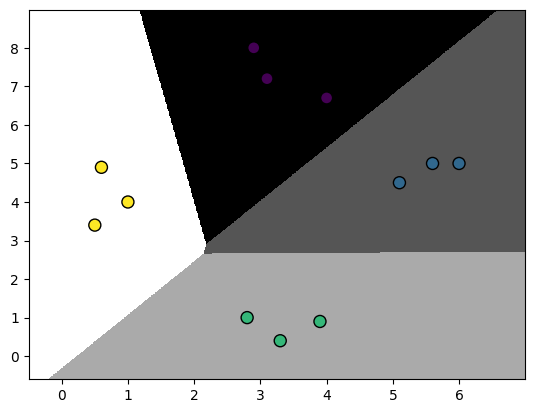

In [ ]:
# Определение образца входных данных
x = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],[6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1],[0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])
# Создание логистического классификатора
model = LogisticRegression(solver='liblinear', C=10)
# Тренировка классификатора
model.fit(x, y)
# Визуализация работы классификатора
visualize_classifier(model, x, y)

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving data_multivar_nb.txt to data_multivar_nb (1).txt


Accuracy of Naive Bayes classifier = 99.75 %


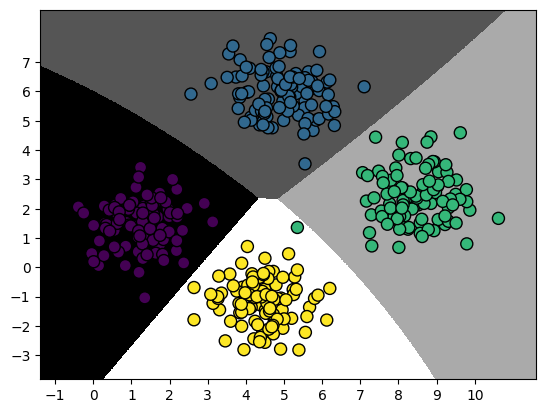

Accuracy of the new classifier = 100.0 %


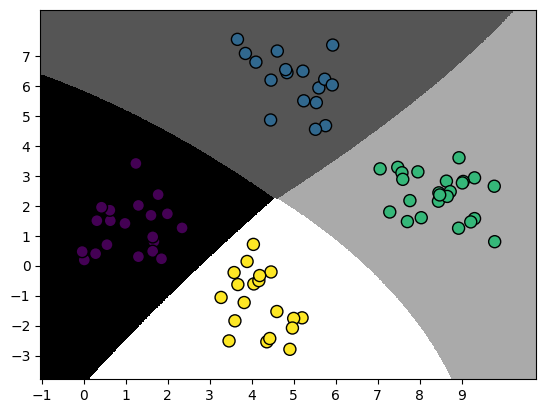

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
Fl: 99.75%


In [ ]:
# Загрузка данных из входного файла
data_multivar = np.loadtxt('data_multivar_nb.txt', delimiter=',')
X, y = data_multivar[:, :-1], data_multivar[:, -1]
# Создание наивного байесовского классификатора
classifier = GaussianNB()
# Тренировка классификатора
classifier.fit(X, y)
# Прогнозирование значений дпя тренировочных данных
y_pred = classifier.predict(X)
# Вычисление качества классификатора
accuracy = 100.0 * (y== y_pred) .sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")
# Визуализация результатов работы классификатора
visualize_classifier(classifier, X, y)

# Разбивка данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)
# Вычисление качества классификатора
accuracy = 100.0 * (y_test == y_test_pred) .sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")
# Визуализация работы классификатора
visualize_classifier(classifier_new, X_test, y_test)

num_folds = 3
accuracy_values = model_selection.cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)#
print("Accuracy: "+ str(round(100*accuracy_values.mean(), 2)) + "%")#
precision_values = model_selection.cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)#
print("Precision: "+ str(round(100*precision_values.mean(),2)) + "%")#
recall_values = model_selection.cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)#
print("Recall: "+ str(round(100*recall_values.mean(), 2)) + "%")#
fl_values = model_selection.cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)#
print("Fl: "+ str(round(100*fl_values.mean(), 2)) + "%")

Матрица неточностей

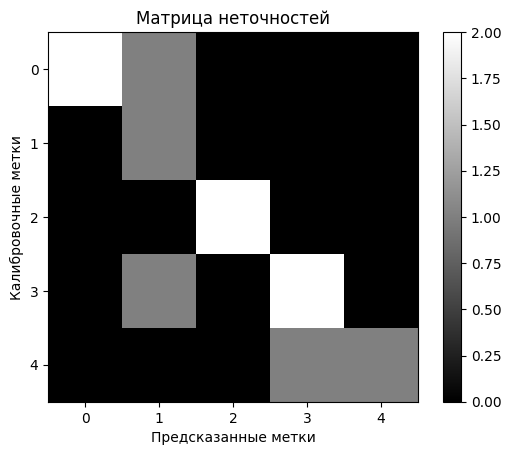


               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Определение выборочных меток
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]
# Построение матрицы неточностей
confusion_mat = confusion_matrix(true_labels, pred_labels)
# Визуализация матрицы неточностей
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Матрица неточностей')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('Калибровочные метки')
plt.xlabel('Предсказанные метки')
plt.show()
# Отчет о результатах классификации
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']#
print('\n', classification_report(true_labels, pred_labels, target_names=targets))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

# Чтение данных
X = []
y = []
count_class_1=0
count_class_2=0
max_datapoints=25000
with open('/income_data.txt', 'r') as f:
  for line in f.readlines():
    if count_class_1>=max_datapoints and
       count_class_2>=max_datapoints:
      break

    if '?' in line:
      continue

    data = line[:-1].split(', ')
    if data[-1] == '<=50K' and count_class_1<max_datapoints:
      X.append(data)
      count_class_1+=1
    if data[-1] == '>50K' and count_class_2<max_datapoints:
      X.append(data)
      count_class_2+=1


# Преобразование в массив numpy
X = np.array(X)
# Преобразование строковых данных в числовые
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
  if item.isdigit():
    X_encoded[:,i] = X[:,i]
  else:
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1] .astype(int)
y = X_encoded[:, -1] .astype(int)
# Создание SVМ-классификатора
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
# Обучение классификатора
classifier.fit(X, y)
 # перекрестная Проверка

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
# Вычисление F-меры для SVМ-классификатора
f1 = model_selection.cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)#
print('F1 score: '+ str(round(100*f1.mean(), 2)) + "%")

# Предсказание результата для тестовой точки данных#
input_data = ['37', 'Private', '215646', 'HS-grad', '9','Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']
# Кодирование тестовой точки данных
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
  if item.isdigit():
    input_data_encoded[i] = int(input_data[i])
  else:
    input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]])[0])
    count += 1
input_data_encoded = np.array([input_data_encoded])##
# Выполнение классификатора для кодированной точки данных
# и вывод результата
predicted_class = classifier.predict(input_data_encoded)#
print(label_encoder[-1].inverse_transform(predicted_class)[0])

F1 score: 76.09%
<=50K
